In [1]:
# preamble imports
import pandas as pd
import numpy as np
np.set_printoptions(precision=8)
import seaborn
from matplotlib import pyplot as plt
import statistics

# Assignment 1 - Descriptive Statistics

#### Patrick Pfenning
#### 01/11/23

Basic Python
---

In [2]:
"""Using the statistics module"""
# Set data
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
# Find mean
statistics.mean(data)

3

In [3]:
# Find median
statistics.median(data)

3.0

In [4]:
# Find mode
statistics.mode(data)

4

In [5]:
# Summarize data
from dataclasses import dataclass, field

"""Python 3.10 has no describe function, so I made my own class to do the same."""

@dataclass
class DescribeResults:
    """Class for describing data"""
    data: list = field(repr=False, default_factory=list)
    # initialize calculations
    mean: float = field(init=False)
    median: float = field(init=False)
    mode: float = field(init=False)
    variance: float = field(init=False)
    stdev: float = field(init=False)
    minmax: tuple = field(init=False)
    sum: float = field(init=False)

    def __post_init__(self):
        """Set Calculations"""
        self.mean = statistics.mean(self.data)
        self.median = statistics.median(self.data)
        self.mode = statistics.mode(self.data)
        self.variance = statistics.variance(self.data)
        self.stdev = statistics.stdev(self.data)
        self.minmax = (min(data), max(data))
        self.sum = sum(data)

DescribeResults(data)

DescribeResults(mean=3, median=3.0, mode=4, variance=1.1111111111111112, stdev=1.0540925533894598, minmax=(1, 4), sum=30)

In [6]:
"""Using the numpy module"""
# mean
np.mean(data)

3.0

In [7]:
# median
np.median(data)

3.0

In [8]:
# std. deviation
np.std(data)

1.0

Data Preparation
---

Before telling our story, we must first clean our data.

In [9]:
# get data
df = pd.read_csv('../data/wine.csv').set_index('unique_id', drop=True)
# transpose for better visibility
df.T.iloc[:, :5]

unique_id,593,617,782,990,822
class,1.00,1.00,1.00,1.00,1.00
alcohol_percentage,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoids,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82


In [10]:
# standardization (maps quantitative values to a bell curve with mean 0)
df_norm = df.iloc[:, 1:-1].copy()
df_norm = (df_norm-df_norm.mean())/df_norm.std()
df_norm[['class', 'price_usd']] = df[['class', 'price_usd']]
df_norm = df_norm[df.columns]
df_norm.T.iloc[:, :5]

unique_id,593,617,782,990,822
class,1.000000,1.000000,1.000000,1.000000,1.000000
alcohol_percentage,1.514341,0.245597,0.196325,1.686791,0.294868
malic_acid,-0.560668,-0.498009,0.021172,-0.345835,0.227053
ash,0.231400,-0.825667,1.106214,0.486554,1.835226
alcalinity,-1.166303,-2.483841,-0.267982,-0.806975,0.450674
magnesium,1.908522,0.018094,0.088110,0.928300,1.278379
phenols,0.806722,0.567048,0.806722,2.484437,0.806722
flavanoids,1.031908,0.731565,1.212114,1.462399,0.661485
nonflavanoids,-0.657708,-0.818411,-0.497005,-0.979113,0.226158
proanthocyanins,1.221438,-0.543189,2.129959,1.029251,0.400275


In [11]:
import statsmodels.api as sm

def stepwise_regression(X, yval):
    initial_list = []
    included = list(initial_list)
    R2 = pd.DataFrame()
    for i in range(X.shape[1]):
        excluded = list(set(X.columns)-set(included))
        new_r2 = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            new_r2[new_column] = sm.OLS(yval, sm.add_constant(X[included+[new_column]])).fit().rsquared
        R2[i] = new_r2
        included.append(new_r2.idxmax())
    return R2.loc[included, :]

stepwise_regression(df.iloc[:, :-1], df.price_usd)

,0,1,2,3,4,5,6,7,8,9,10,11
alcohol_percentage,0.414375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,0.401597,0.614371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.099919,0.416183,0.678285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
magnesium,0.154725,0.466147,0.643225,0.694895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flavanoids,0.244227,0.538108,0.616211,0.688724,0.705815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hue,0.055783,0.494520,0.615202,0.681368,0.697427,0.709529,NaN,NaN,NaN,NaN,NaN,NaN
phenols,0.248118,0.520607,0.614936,0.679105,0.696087,0.708484,0.712075,NaN,NaN,NaN,NaN,NaN
ash,0.050009,0.422381,0.624189,0.680807,0.695381,0.707020,0.710825,0.713403,NaN,NaN,NaN,NaN
alcalinity,0.194126,0.478584,0.617090,0.680205,0.697806,0.706998,0.710591,0.713028,0.718038,NaN,NaN,NaN
nonflavanoids,0.096961,0.460010,0.614389,0.678330,0.695228,0.705942,0.709860,0.712482,0.714673,0.719187,NaN,NaN


In [12]:
from itertools import chain, combinations

def best_subset(X, y):
    n_features = X.shape[1]
    subsets = chain.from_iterable(combinations(X.columns, k+1) for k in np.arange(n_features))
    best_score = -np.inf
    best_grp = None
    for subset in subsets:
        subset = list(subset)
        lin_reg = sm.OLS(y, X[subset]).fit()
        score = lin_reg.rsquared_adj
        if score > best_score:
            best_score, best_grp = score, subset
    return best_grp

best_sub = best_subset(df.iloc[:, :-1], df.price_usd)

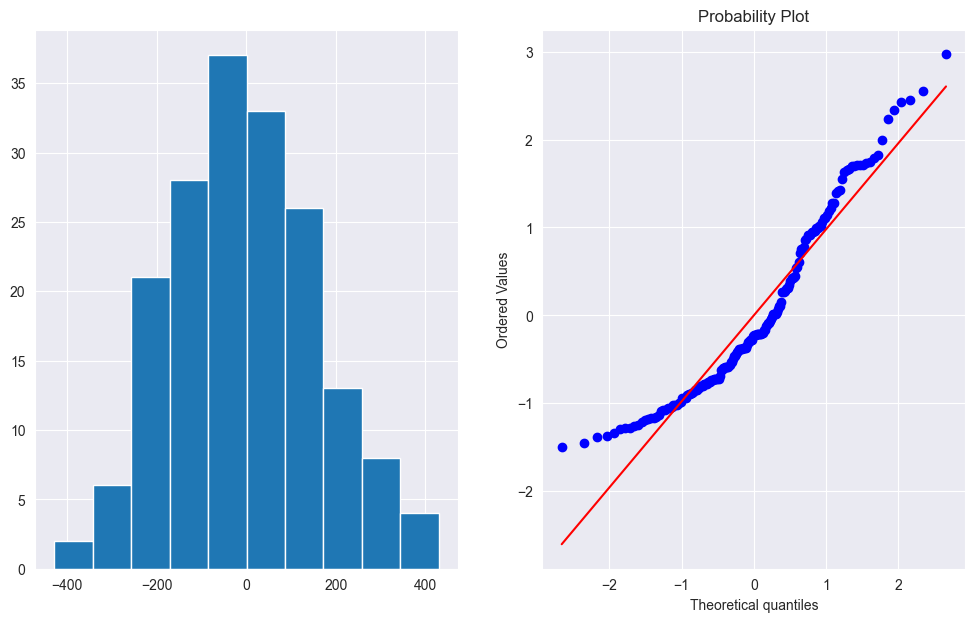

In [13]:
"""Residuals for multi-linear reg"""

import scipy.stats as stats

y = df.price_usd
x = sm.add_constant(df[best_sub])

results = sm.OLS(y, x).fit()
y_pred = results.predict(x)
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
results.resid.hist(ax=ax[0])
z = (y-np.mean(y))/np.std(y)
qq = stats.probplot(z, dist="norm", plot=plt) # outliers are visible

Raw Data


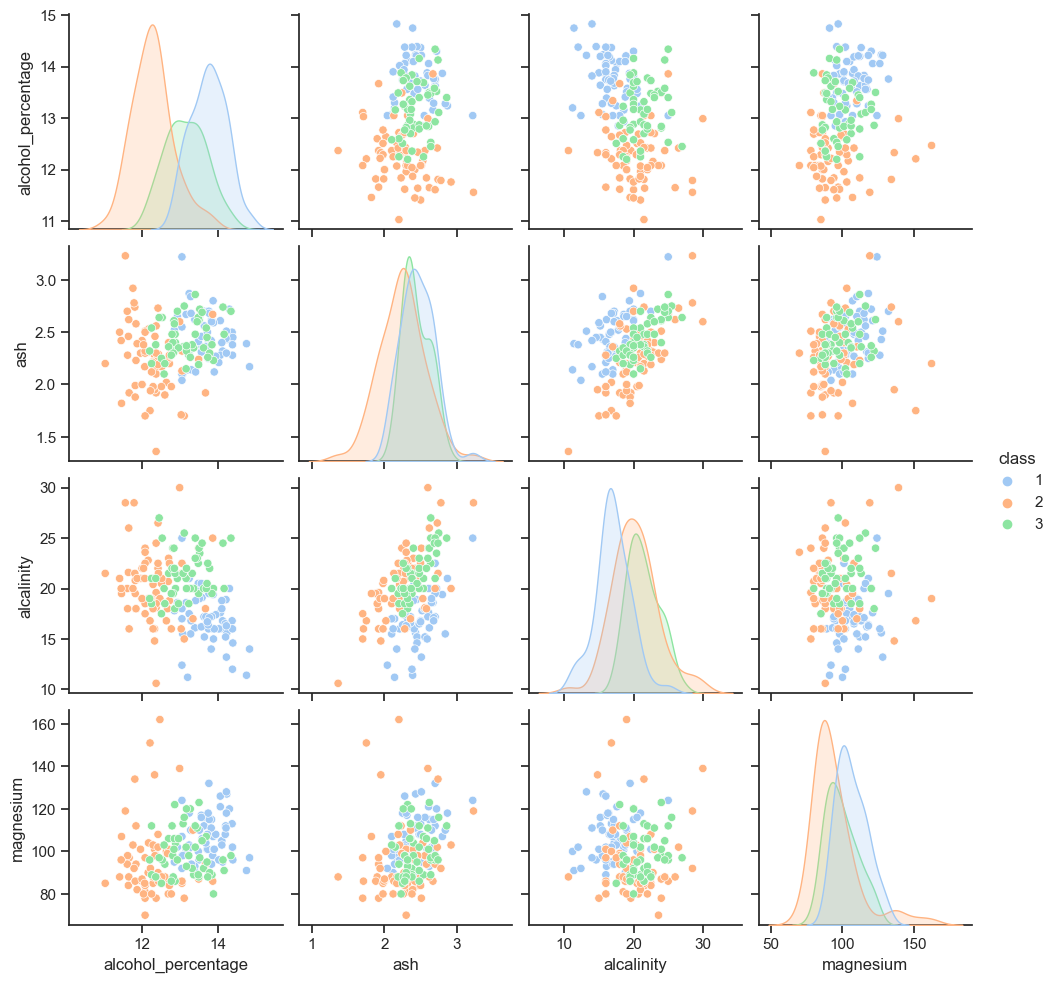

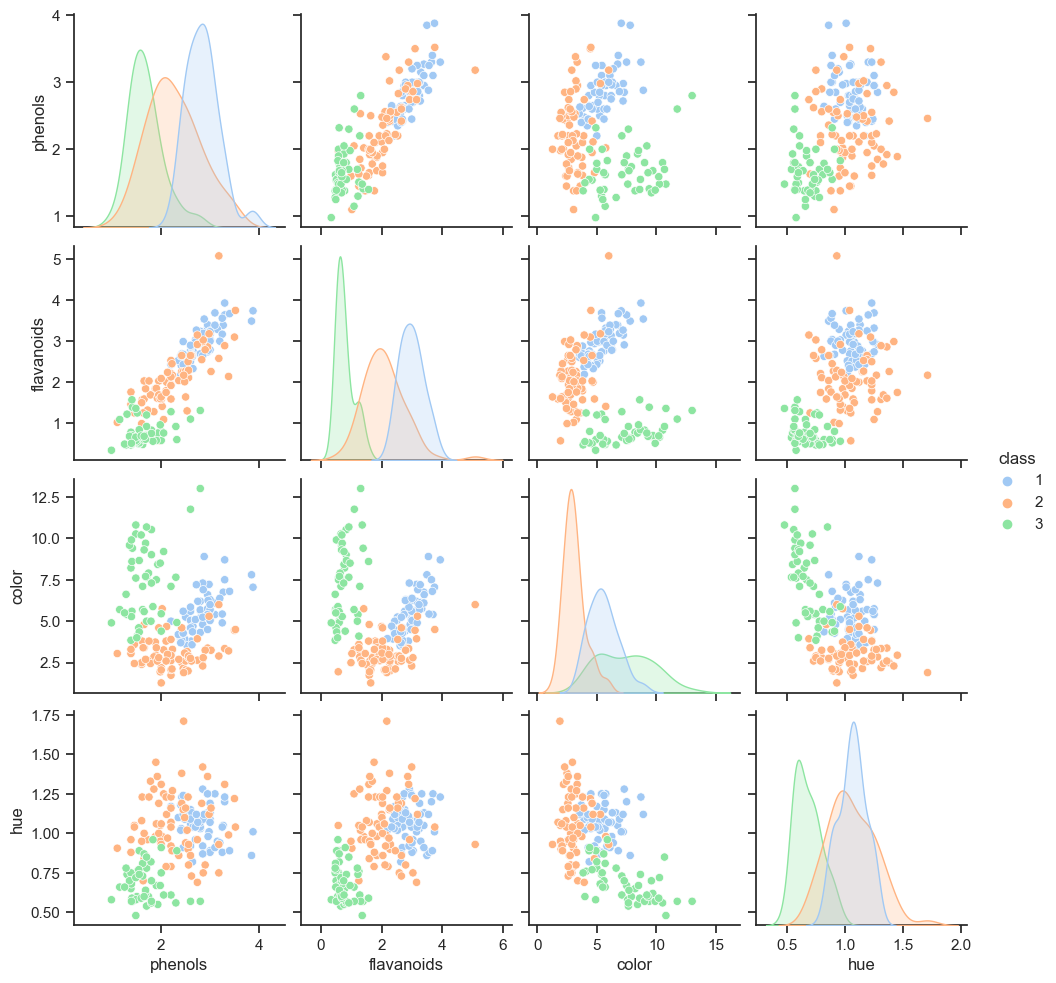

In [14]:
"""SPLOM chart using best features"""
import seaborn as sns
sns.set_theme(style="ticks")

print(f'{"="*50}\nRaw Data\n{"="*50}')
sns.pairplot(df[best_sub[:5]], hue="class", palette='pastel')
sns.pairplot(df[['class'] + best_sub[5:]], hue="class", palette='pastel')

Standardized Data


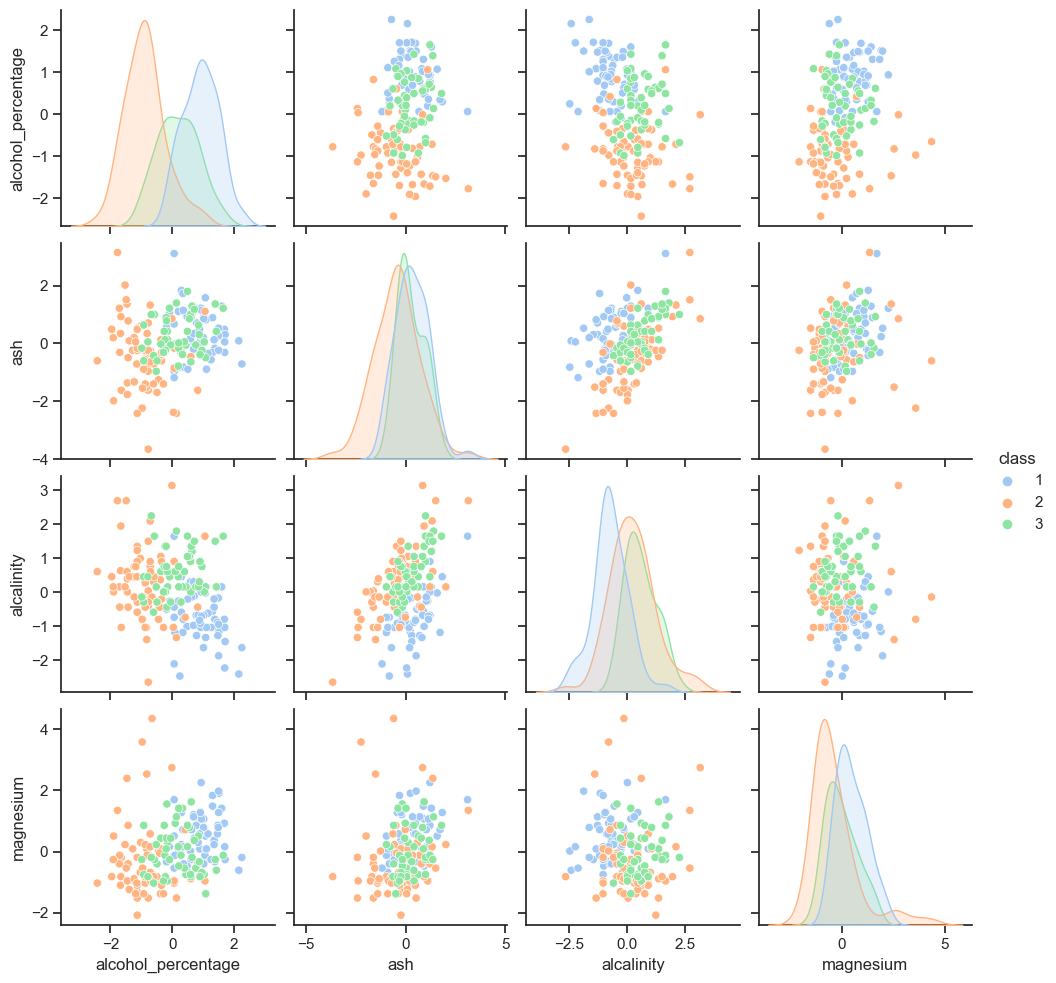

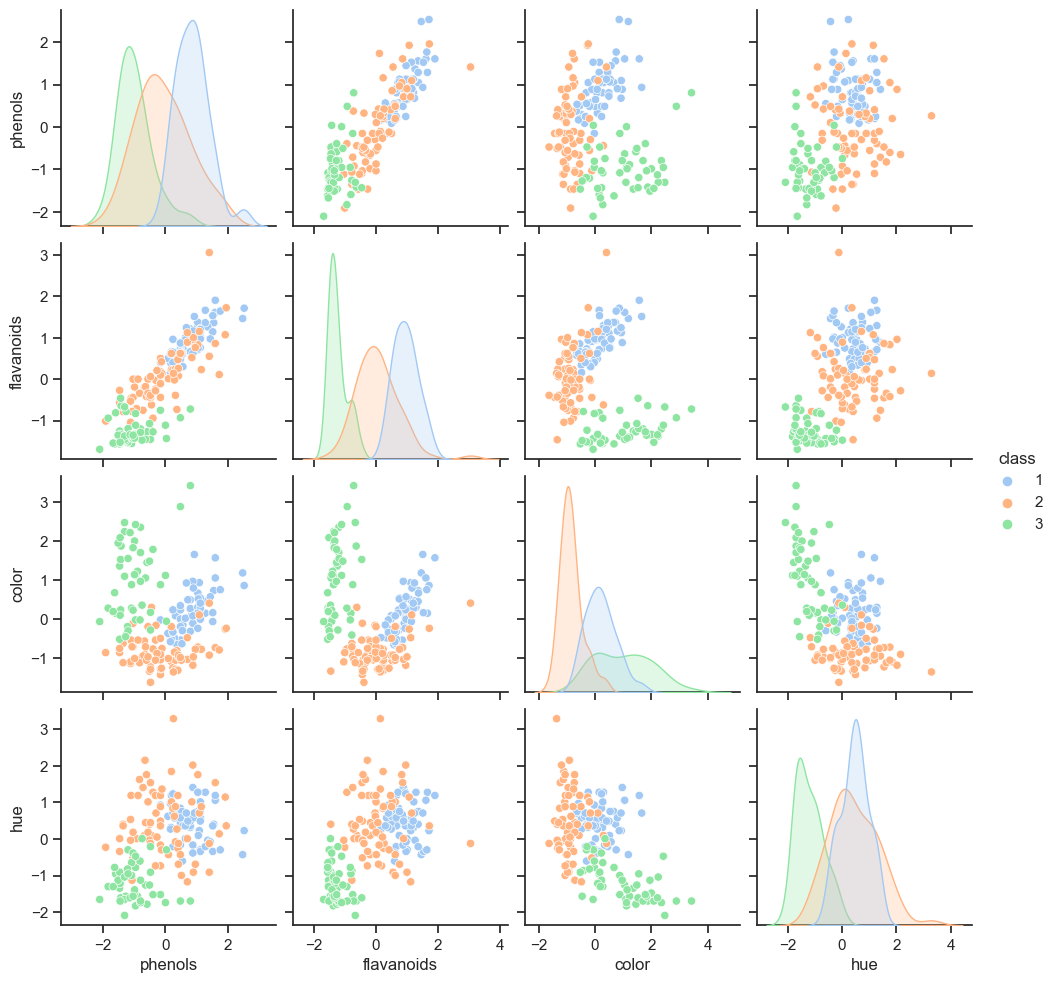

In [15]:
print(f'{"="*50}\nStandardized Data\n{"="*50}')
sns.pairplot(df_norm[best_sub[:5]], hue="class", palette='pastel')
sns.pairplot(df_norm[['class'] + best_sub[5:]], hue="class", palette='pastel')